# Model Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from pricing.benchmark import Benchmark

from pricing.models.baseline import LogisticRegressor
from pricing.models.preprocessing import build_model
import warnings

from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", message="lbfgs failed to converge", category=ConvergenceWarning)


In [2]:
file_path = 'data/export.xlsx'
df = pd.read_excel(file_path)
X = df.drop(['Bag_Purchased', 'bag_base_price'], axis=1)
y = df['Bag_Purchased']

In [3]:
pl = build_model(imputer=True, engineered=True, interactions=True, dim_reduction="svd", scaler=True)
pl.set_params(svd__n_components=20)

Pipeline(steps=[('imputer',
                 ColumnTransformer(transformers=[('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['airlines', 'partner',
                                                   'market_group']),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['distance',
                                                   'est_dst_temperature',
                                                   'src_dst_gdp',
                                                   'bag_total_price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_m...
                                                   'travel_time', 'price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_movement_outside_us',
                                                   'price_ratio',
                                                   'log_grp_ratio',
                                                   'log_distance', 'log_price',
                                                   'log_travel_time',
                                                   'log_src_dst_gdp',
                                                   'log_passengers'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('svd', TruncatedSVD(n_components=20))])

In [4]:
pl.fit(X, y)

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('imputer',
                 ColumnTransformer(transformers=[('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['airlines', 'partner',
                                                   'market_group']),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['distance',
                                                   'est_dst_temperature',
                                                   'src_dst_gdp',
                                                   'bag_total_price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_m...
                                                   'travel_time', 'price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_movement_outside_us',
                                                   'price_ratio',
                                                   'log_grp_ratio',
                                                   'log_distance', 'log_price',
                                                   'log_travel_time',
                                                   'log_src_dst_gdp',
                                                   'log_passengers'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('svd', TruncatedSVD(n_components=20))])

In [5]:
svd = pl.named_steps.svd
columns = svd.feature_names_in_
index = svd.get_feature_names_out()

svd_df = pd.DataFrame(svd.components_, index=index, columns=columns)

passengers price_ratio                0.040605
price_ratio log_price                 0.040628
us_movement_outside_us log_price      0.040663
distance price                        0.040839
bag_total_price price                 0.040877
                                        ...   
market_group_market2                  0.061879
children is_intercontinental          0.066718
is_intercontinental log_passengers    0.067211
booking_window_group_21 - 60 days     0.068492
airlines_airline2                     0.069511
Length: 125, dtype: float64

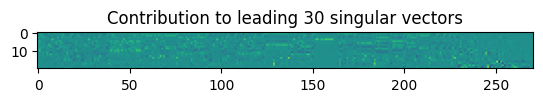

In [6]:
fig = plt.imshow(svd_df)
fig.axes.set_title("Contribution to leading 30 singular vectors")
features = svd_df.abs().mean().sort_values() 
features.tail(125)

Text(0.5, 1.0, 'Absolute feature contributions')

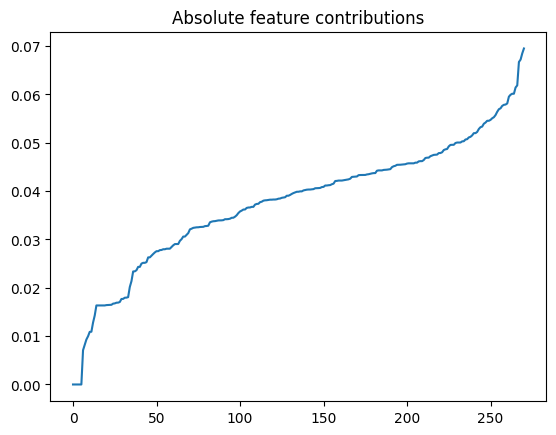

In [7]:
fig = plt.plot(features.values)
plt.title("Absolute feature contributions")

In [8]:
features[features > 0.02].index.values

array(['market_group_market14', 'market_group_market5',
       'booking_window_group_122 - 178 days',
       'booking_window_group_179 - 319 days', 'market_group_market7',
       'log_grp_ratio log_price', 'src_dst_gdp log_price',
       'travel_time log_price', 'src_dst_gdp log_distance',
       'log_grp_ratio log_distance', 'market_group_market8',
       'src_dst_gdp', 'log_grp_ratio', 'price log_travel_time',
       'travel_time log_distance', 'travel_time',
       'log_grp_ratio log_travel_time', 'src_dst_gdp log_travel_time',
       'log_distance log_passengers', 'log_travel_time^2',
       'price log_grp_ratio', 'src_dst_gdp price', 'distance',
       'src_dst_gdp bag_weight', 'bag_weight log_grp_ratio',
       'log_price log_passengers', 'distance log_price', 'log_passengers',
       'est_dst_temperature src_dst_gdp',
       'est_dst_temperature log_grp_ratio', 'passengers log_distance',
       'distance log_distance', 'src_dst_gdp travel_time',
       'travel_time log_grp_ratio

In [9]:
# The is the structure of the preprocessing pipeline
model = build_model(imputer=True, engineered=True, interactions=True, dim_reduction="svd", scaler=True)

model

Pipeline(steps=[('imputer',
                 ColumnTransformer(transformers=[('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['airlines', 'partner',
                                                   'market_group']),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['distance',
                                                   'est_dst_temperature',
                                                   'src_dst_gdp',
                                                   'bag_total_price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_m...
                                                   'travel_time', 'price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers',
                                                   'is_intercontinental',
                                                   'within_country',
                                                   'us_movement_outside_us',
                                                   'price_ratio',
                                                   'log_grp_ratio',
                                                   'log_distance', 'log_price',
                                                   'log_travel_time',
                                                   'log_src_dst_gdp',
                                                   'log_passengers'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('svd', TruncatedSVD(n_components=30))])

In [10]:
# The simplest regression model 
#baseline = LogisticRegressor(max_iter=1000, penalty='l1', solver='liblinear')
baseline = build_model(model=LogisticRegression())

# LR with Linear Regression imputation for ticket price
LR_imputed = build_model(imputer=True, engineered=False, interactions=False, scaler=False, model=LogisticRegression())
LR_imputed.set_params(classifier__max_iter=1000, classifier__penalty='l1', classifier__solver='liblinear')

# LR with some feature engineering
LR_eng = build_model(imputer=False, engineered=True, interactions=False, model=LogisticRegression())
LR_eng.set_params(classifier__max_iter=1000, classifier__penalty='l1', classifier__solver='liblinear')

# LR with second order interactions among variables
LR_interactions = build_model(imputer=False, engineered=False, interactions=True, model=LogisticRegression())
LR_interactions.set_params(classifier__max_iter=1000, classifier__penalty='l1', classifier__solver='liblinear')

# LR with LR imputation, engineered features, second order interactions and feature selection by Latent Semantic Analysis (SVD)
LR_feature_select = build_model(imputer=True, engineered=True, interactions=True, features=features.index.values, model=LogisticRegression())
LR_feature_select.set_params(classifier__class_weight='balanced', classifier__solver='liblinear')

# LR with interactions and LSA
LR_svd = build_model(imputer=False, engineered=False, interactions=True, dim_reduction="svd", model=LogisticRegression())
LR_svd.set_params(classifier__class_weight='balanced')

# K-best feature selection using ANOVA
LR_kbest = build_model(imputer=False, engineered=False, interactions=True, dim_reduction='kbest', model=LogisticRegression())
LR_kbest.set_params(classifier__class_weight='balanced', classifier__solver='liblinear')

# Principal Component Analysis
LR_pca = build_model(imputer=False, engineered=False, interactions=True, dim_reduction='pca', model=LogisticRegression())
LR_pca.set_params(classifier__class_weight='balanced', classifier__penalty='l1', classifier__solver='liblinear')


models={
    'baseline': baseline,
    'LR_imputed': LR_imputed,
    'LR_eng': LR_eng,
    'LR_interactions': LR_interactions,
    'LR_feature_select': LR_feature_select,
    'LR_kbest': LR_kbest,
    'LR_svd': LR_svd,
    'LR_pca': LR_pca,
}

In [11]:
benchmark = Benchmark(models=models)
scores = benchmark.evaluate()
scores

  0%|          | 0/8 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [78 91 93 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [78 91 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-pac

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

,ROC-AUC Score
LR_eng,0.775066
LR_interactions,0.774404
LR_imputed,0.766033
LR_kbest,0.744490
baseline,0.742510
LR_feature_select,0.736612
LR_pca,0.732388
LR_svd,0.712990


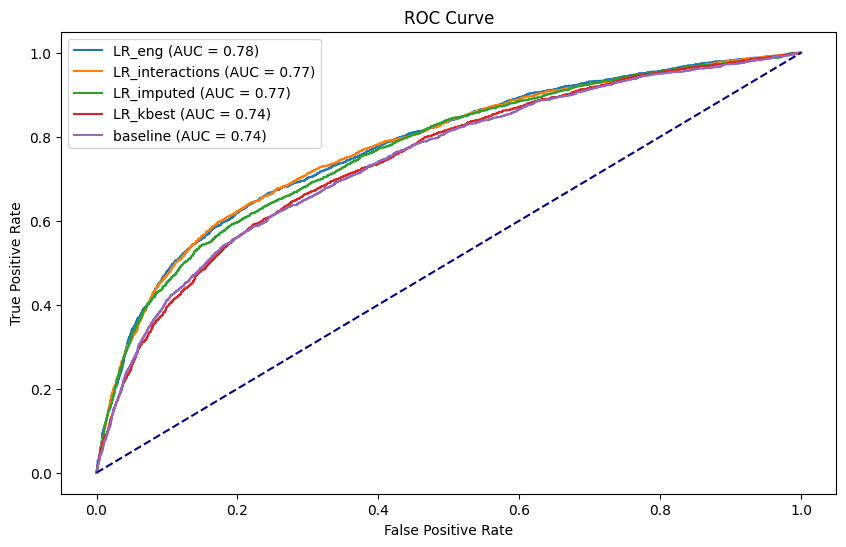

In [12]:
benchmark.roc_auc_plot(models=scores.head(5).index)

It seems that feature engineering, interactions, linear regression imputation and ANOVA f-test for dimensionality are the best choices

In [13]:
models['LR_best'] = build_model(imputer=True, engineered=True, interactions=True, dim_reduction='kbest', model=LogisticRegression())
models['LR_best'].set_params(classifier__max_iter=1000, classifier__penalty='l1', classifier__solver='liblinear')

benchmark = Benchmark(models=models)
benchmark.evaluate()

  0%|          | 0/9 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [78 91 93 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [78 91 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-pac

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [127 154 156 162 163 176 192] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [127 154 162 163 176 192] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/amonras/.pyenv/versions/3.12.2/en

,ROC-AUC Score
LR_eng,0.774778
LR_interactions,0.774289
LR_imputed,0.766031
LR_best,0.749501
LR_kbest,0.744490
baseline,0.742510
LR_feature_select,0.736612
LR_pca,0.732403
LR_svd,0.713083


Not really better. Let's try with sample balancing

In [14]:
models = {
    'LR_eng': LR_eng,
    'baseline': baseline,
    'LR_eng_balanced': build_model(imputer=True, engineered=True, interactions=False, model=LogisticRegression())
}
models['LR_eng_balanced'].set_params(
    classifier__max_iter=1000, 
    classifier__penalty='l1', 
    classifier__solver='liblinear', 
    classifier__class_weight='balanced'
)

bm = Benchmark(models=models)
bm.evaluate()

  0%|          | 0/3 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

,ROC-AUC Score
LR_eng,0.775052
LR_eng_balanced,0.771443
baseline,0.742510


Slightly better. Let's try now with different regression techniques

In [15]:
models['GB'] = build_model(imputer=False, engineered=True, interactions=False, model=GradientBoostingClassifier())
models['GB_interactions'] = build_model(imputer=False, engineered=True, interactions=True, model=GradientBoostingClassifier())
models['SVM'] = build_model(imputer=False, engineered=True, interactions=False, model=SVC(probability=True))
models['NB'] = build_model(imputer=False, engineered=True, interactions=False, model=GaussianNB())

In [16]:
bm = Benchmark(models=models)
bm.evaluate()

  0%|          | 0/7 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

,ROC-AUC Score
GB,0.782256
GB_interactions,0.782235
LR_eng,0.774823
LR_eng_balanced,0.771427
baseline,0.742510
NB,0.734470
SVM,0.568895


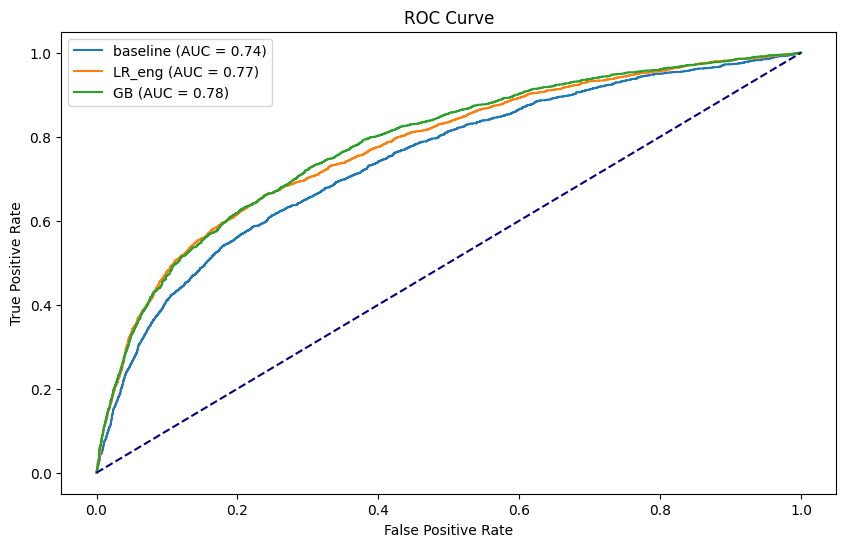

In [17]:
bm.roc_auc_plot(models=['baseline', 'LR_eng', 'GB'])

**The best model is Gradient Boosting with engineered features**

In [18]:
models['GB']

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('imputer',
                 ColumnTransformer(transformers=[('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['airlines',
                                                   'booking_window_group',
                                                   'partner', 'market_group']),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['distance',
                                                   'est_dst_temperature',
                                                   'src_dst_gdp',
                                                   'bag_total_price',
                                                   'travel_time', 'price',
                                                   'children', 'bag_weight',
                                                   'nr_of_stopovers',
                                                   'passengers'...
                                                  ['airlines',
                                                   'booking_window_group',
                                                   'partner',
                                                   'market_group'])],
                                   verbose_feature_names_out=False)),
                ('engineered',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('precompute', ExtraFeatures(),
                                                  ['bag_total_price',
                                                   'distance', 'price',
                                                   'travel_time', 'src_dst_gdp',
                                                   'passengers'])],
                                   verbose_feature_names_out=False)),
                ('classifier', GradientBoostingClassifier())])